## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## --> PCA (First 220)
## --> '0' class removed 
## --> Standardization 
## --> First 32 components
## --> 70% Train 30% Test
## --> Grid search SVM where kernal = 'rbf' , C = [1,10,50,100,150,200] and gamma = [10,1,0.1,0.01,0.001,0.0001]

## Best Accuracy : 86.6%

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

## reading .lan file

In [2]:
#import the package
from spectral import *

In [3]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 5\sample-data-master\92AV3C.lan')

In [4]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 5\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [5]:
data.shape

(145, 145, 220)

In [6]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

In [7]:
# data[0] won't work here
data[0,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]]], dtype=int16)

In [8]:
data[0,0,:]

array([[[3172, 4142, 4506, 4279, 4782, 5048, 5213, 5106, 5053, 4750,
         4816, 4769, 4610, 4805, 4828, 4861, 4767, 4624, 4549, 4463,
         4462, 4446, 4445, 4336, 4381, 4319, 4207, 4305, 4311, 3991,
         4168, 3942, 4061, 4365, 4318, 4252, 4869, 5284, 5055, 3591,
         5175, 5217, 5058, 4969, 4721, 4291, 4555, 4886, 4868, 4806,
         4783, 4811, 4709, 3903, 3795, 3715, 3359, 2130, 2269, 2480,
         3145, 3626, 4060, 4296, 4211, 4225, 4157, 4133, 4082, 4048,
         3935, 3843, 3784, 3642, 3271, 2707, 1707, 1564, 1838, 1719,
         2229, 2764, 2919, 2873, 2977, 2913, 3034, 3051, 3124, 3101,
         3033, 2713, 2740, 2947, 2706, 2834, 2856, 2683, 2400, 2229,
         1822, 1542, 1097, 1029, 1020, 1026, 1009, 1011, 1047, 1069,
         1100, 1122, 1259, 1365, 1261, 1374, 1630, 1851, 2028, 2130,
         2170, 2205, 2214, 2204, 2100, 2106, 2146, 2089, 2078, 2134,
         2127, 2074, 2057, 2045, 2003, 1999, 1959, 1924, 1883, 1843,
         1781, 1716, 1698, 1645, 1

In [9]:
# (0,0) pixel value of band 0
data[0,0,0]

3172

In [10]:
# (0,0) pixel value of band 1
data[0,0,1]

4142

In [11]:
# (0,0) pixel value of band 219
data[0,0,219]

1005

In [12]:
ground_truth = open_image('D:\Academic Thesis Papers\Thesis Report 5\sample-data-master\92AV3GT.GIS').read_band(0)

In [13]:
ground_truth

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [14]:
ground_truth_data = ground_truth
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

## Preparing Data by making the band number as features and pixel number as rows

In [15]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [16]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

In [17]:
np.array(dictionary['band_1'])

array([3172, 3348, 3687, ..., 3153, 3155, 3323], dtype=int16)

In [18]:
np.array(dictionary['band_1']).shape

(21025,)

In [19]:
np.array(dictionary['band_1']).reshape(145,145)

array([[3172, 3348, 3687, ..., 3341, 3170, 3172],
       [3344, 3515, 3518, ..., 3859, 3686, 3512],
       [3512, 3344, 3512, ..., 3341, 3344, 3510],
       ...,
       [3324, 2983, 2988, ..., 3332, 3498, 3156],
       [3161, 3495, 2988, ..., 3156, 3159, 3329],
       [2979, 2977, 2814, ..., 3153, 3155, 3323]], dtype=int16)

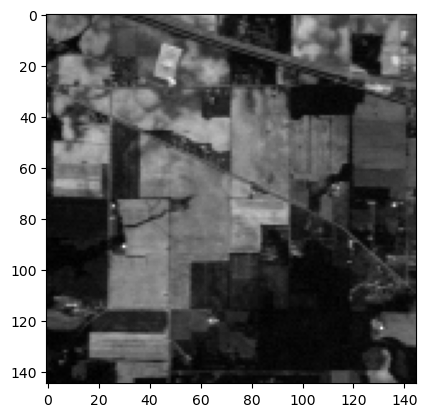

In [20]:
plt.imshow(np.array(dictionary['band_32']).reshape(145,145),cmap='gray')
plt.show()

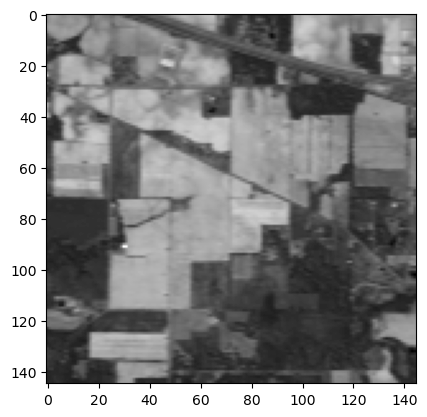

In [21]:
plt.imshow(np.array(dictionary['band_122']).reshape(145,145),cmap='gray')
plt.show()

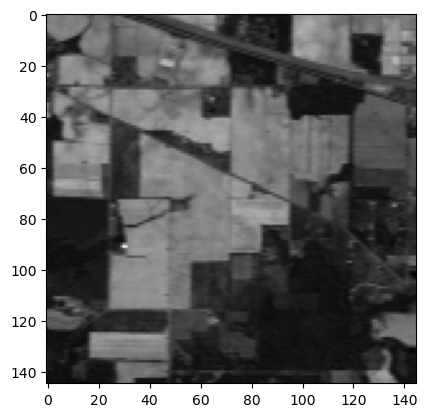

In [22]:
plt.imshow(np.array(dictionary['band_183']).reshape(145,145),cmap='gray')
plt.show()

## Preparing ground truth data as target data

In [23]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [24]:
ground_truth_data.shape

(145, 145)

In [25]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

So there are total 17 classes in this ground truth data

In [26]:
ground_truth_data.reshape(21025,1)

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [27]:
target = ground_truth_data.reshape(21025,1)
target

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [28]:
print(target.shape)
print(target.ndim)

(21025, 1)
2


but still, 'target' remains as 2D since it's shape is (21025,1). So we need 'target' to be 1D

In [29]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [30]:
print(target.shape)
print(target.ndim)

(21025,)
1


# making df

In [31]:
df = pd.DataFrame(dictionary)

In [32]:
df.head()

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0    3172    4142    4506    4279    4782    5048    5213    5106    5053   
1    3348    4266    4502    4426    4853    5249    5352    5353    5347   
2    3687    4266    4421    4498    5019    5293    5438    5427    5383   
3    3517    4258    4603    4493    4958    5234    5417    5355    5349   
4    3514    4018    4675    4417    4886    5117    5215    5096    5098   

   band_10  ...  band_211  band_212  band_213  band_214  band_215  band_216  \
0     4750  ...      1094      1090      1112      1090      1062      1069   
1     5065  ...      1108      1104      1117      1091      1079      1085   
2     5132  ...      1111      1114      1114      1100      1065      1092   
3     5096  ...      1122      1108      1109      1109      1071      1088   
4     4834  ...      1110      1107      1112      1094      1072      1087   

   band_217  band_218  band_219  band_220  
0      1057      1020      1020      1005  
1      1064      1029      1020      1000  
2      1061      1030      1016      1009  
3      1060      1030      1006      1005  
4      1052      1034      1019      1019  

[5 rows x 220 columns]

## PCA Implement

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=220)

In [35]:
pca.fit(df)

PCA(n_components=220)

In [36]:
x_pca = pca.transform(df)

In [37]:
x_pca

array([[ 4.81562376e+03,  1.66913344e+03,  1.12562264e+02, ...,
         9.61046670e-01, -4.87760741e+00,  3.01071219e+00],
       [ 5.33889373e+03, -1.89248435e+03,  5.40735016e+02, ...,
        -5.02574764e-01,  5.22132578e-01,  3.72713050e+00],
       [ 5.53042002e+03, -2.97110985e+03,  6.03055291e+02, ...,
         3.43113123e+00, -1.77436915e+00,  4.99033242e+00],
       ...,
       [-7.33263880e+03, -9.31188929e+02,  3.57977652e+02, ...,
         3.42340704e+00,  1.67943749e+00,  2.15936311e+00],
       [-6.39376586e+03,  9.64920627e+02,  5.37399264e+02, ...,
        -2.65369407e+00,  3.67916922e+00,  2.84696967e-01],
       [-6.56980718e+03,  5.57058792e+02,  3.28249970e+02, ...,
        -1.14508605e+01,  5.38862871e+00,  1.92067560e+00]])

In [38]:
pca.explained_variance_ratio_

array([7.24849881e-01, 2.46432669e-01, 1.73174087e-02, 3.67057948e-03,
       1.97826709e-03, 1.52124126e-03, 7.42014564e-04, 3.88880238e-04,
       3.61837403e-04, 2.38050088e-04, 1.94889971e-04, 1.66701193e-04,
       1.44338899e-04, 9.03848043e-05, 8.67280361e-05, 7.75726678e-05,
       7.35405648e-05, 6.47775974e-05, 5.95473969e-05, 5.33565124e-05,
       5.11018350e-05, 4.97372256e-05, 4.56847377e-05, 4.39398586e-05,
       4.32211989e-05, 4.20930738e-05, 4.01224344e-05, 3.92831992e-05,
       3.85223896e-05, 3.72372428e-05, 3.58084100e-05, 3.44346443e-05,
       3.36155191e-05, 3.33830886e-05, 3.30667846e-05, 3.22172032e-05,
       3.17161616e-05, 2.90004623e-05, 2.78837434e-05, 2.57299037e-05,
       2.39877380e-05, 2.37988411e-05, 2.08024063e-05, 2.02854027e-05,
       1.90528024e-05, 1.72736592e-05, 1.67542562e-05, 1.64540245e-05,
       1.53387165e-05, 1.41669044e-05, 1.35544506e-05, 1.33376011e-05,
       1.24424598e-05, 1.13757305e-05, 1.11647606e-05, 1.08555192e-05,
      

In [39]:
df.shape

(21025, 220)

In [40]:
x_pca.shape

(21025, 220)

## '0' class removing

In [41]:
df = pd.DataFrame(data=x_pca)

In [42]:
df

0            1           2           3           4    \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
21020 -7554.689866 -1541.397976  331.382624  -84.248013 -417.079075   
21021 -7745.890334 -1661.726883  367.177302 -164.646216 -604.817304   
21022 -7332.638799  -931.188929  357.977652 -161.124300 -408.376476   
21023 -6393.765861   964.920627  537.399264 -170.650809 -578.917720   
21024 -6569.807177   557.058792  328.249970  -20.350981 -628.351645   

              5           6           7           8           9    ...  \
0      -84.974139  229.299837   69.401610   23.714404   77.244773  ...   
1     -169.949911   94.494190   14.128243    5.857857   -7.476846  ...   
2     -124.225567 -194.726258   72.184773  -33.078210 -151.799743  ...   
3      -18.351271  -20.370909   74.547261  -15.527945    7.762407  ...   
4       61.531775  -69.275046  217.284254  -47.142043  205.937634  ...   
...           ...         ...         ...         ...         ...  ...   
21020  166.392946  -15.650576  -57.740080 -138.643151  -55.450180  ...   
21021  217.529046 -143.076977 -119.195912 -153.558549 -155.623194  ...   
21022  219.442394  168.856471   49.630904 -247.195454  165.293887  ...   
21023   11.981695  106.196477 -186.724968  -76.842053   13.203929  ...   
21024 -134.929681  -82.950838   94.520762   43.371773   69.598578  ...   

            210       211        212       213       214       215        216  \
0     -5.160339 -5.603185  -1.801133  0.109173 -6.969705  5.839371   4.229097   
1     -1.360093  2.094940  -3.006143  7.219704 -6.177719  3.233089  10.928748   
2     -5.862886  7.379155  10.108600  7.371734 -4.468378 -3.093500   1.237071   
3      0.901598  6.405919   5.936445  2.351104 -2.798023 -6.852584   4.266255   
4      4.507495 -1.492014   4.948307 -1.356069 -3.330992  1.648180   4.324575   
...         ...       ...        ...       ...       ...       ...        ...   
21020 -2.071384  0.737540  -3.578498  3.366385 -1.814826 -0.467084   7.873520   
21021 -1.217059 -6.499968  -4.141025  3.037855 -4.655417  1.975429  -0.479829   
21022  1.044566 -5.558994  -2.195058 -0.251981  0.437210  0.056625  -4.539586   
21023  0.576406  0.884197  -5.855398 -2.209356  4.879723  0.890802  -3.420271   
21024  0.540037  5.813333 -10.962552 -5.925131  0.791846  1.949720  -1.914419   

             217        218       219  
0       0.961047  -4.877607  3.010712  
1      -0.502575   0.522133  3.727130  
2       3.431131  -1.774369  4.990332  
3       5.416104  -0.495463 -3.547940  
4      -2.870397   3.498579 -8.391484  
...          ...        ...       ...  
21020   1.329226  -7.938531 -4.000450  
21021   2.456719 -10.624350  4.831763  
21022   3.423407   1.679437  2.159363  
21023  -2.653694   3.679169  0.284697  
21024 -11.450860   5.388629  1.920676  

[21025 rows x 220 columns]

In [43]:
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [44]:
df['target'] = target
df

0            1           2           3           4  \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
21020 -7554.689866 -1541.397976  331.382624  -84.248013 -417.079075   
21021 -7745.890334 -1661.726883  367.177302 -164.646216 -604.817304   
21022 -7332.638799  -931.188929  357.977652 -161.124300 -408.376476   
21023 -6393.765861   964.920627  537.399264 -170.650809 -578.917720   
21024 -6569.807177   557.058792  328.249970  -20.350981 -628.351645   

                5           6           7           8           9  ...  \
0      -84.974139  229.299837   69.401610   23.714404   77.244773  ...   
1     -169.949911   94.494190   14.128243    5.857857   -7.476846  ...   
2     -124.225567 -194.726258   72.184773  -33.078210 -151.799743  ...   
3      -18.351271  -20.370909   74.547261  -15.527945    7.762407  ...   
4       61.531775  -69.275046  217.284254  -47.142043  205.937634  ...   
...           ...         ...         ...         ...         ...  ...   
21020  166.392946  -15.650576  -57.740080 -138.643151  -55.450180  ...   
21021  217.529046 -143.076977 -119.195912 -153.558549 -155.623194  ...   
21022  219.442394  168.856471   49.630904 -247.195454  165.293887  ...   
21023   11.981695  106.196477 -186.724968  -76.842053   13.203929  ...   
21024 -134.929681  -82.950838   94.520762   43.371773   69.598578  ...   

            211        212       213       214       215        216  \
0     -5.603185  -1.801133  0.109173 -6.969705  5.839371   4.229097   
1      2.094940  -3.006143  7.219704 -6.177719  3.233089  10.928748   
2      7.379155  10.108600  7.371734 -4.468378 -3.093500   1.237071   
3      6.405919   5.936445  2.351104 -2.798023 -6.852584   4.266255   
4     -1.492014   4.948307 -1.356069 -3.330992  1.648180   4.324575   
...         ...        ...       ...       ...       ...        ...   
21020  0.737540  -3.578498  3.366385 -1.814826 -0.467084   7.873520   
21021 -6.499968  -4.141025  3.037855 -4.655417  1.975429  -0.479829   
21022 -5.558994  -2.195058 -0.251981  0.437210  0.056625  -4.539586   
21023  0.884197  -5.855398 -2.209356  4.879723  0.890802  -3.420271   
21024  5.813333 -10.962552 -5.925131  0.791846  1.949720  -1.914419   

             217        218       219  target  
0       0.961047  -4.877607  3.010712       3  
1      -0.502575   0.522133  3.727130       3  
2       3.431131  -1.774369  4.990332       3  
3       5.416104  -0.495463 -3.547940       3  
4      -2.870397   3.498579 -8.391484       3  
...          ...        ...       ...     ...  
21020   1.329226  -7.938531 -4.000450       0  
21021   2.456719 -10.624350  4.831763       0  
21022   3.423407   1.679437  2.159363       0  
21023  -2.653694   3.679169  0.284697       0  
21024 -11.450860   5.388629  1.920676       0  

[21025 rows x 221 columns]

In [45]:
df = df[df['target']!=0]

In [46]:
df

0            1           2           3           4  \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
20763  2244.975888  1796.508413 -590.878503  -21.364340  112.648659   
20764  3300.173175   627.421128 -648.879106 -275.930007  182.919132   
20765  3751.949638  -200.703069 -584.986761 -320.843632  217.369936   
20766  4102.102113  -426.155746 -566.365050 -405.848803  227.896339   
20767  4419.017376  -466.361625 -538.091716 -286.941245   18.532133   

                5           6           7           8           9  ...  \
0      -84.974139  229.299837   69.401610   23.714404   77.244773  ...   
1     -169.949911   94.494190   14.128243    5.857857   -7.476846  ...   
2     -124.225567 -194.726258   72.184773  -33.078210 -151.799743  ...   
3      -18.351271  -20.370909   74.547261  -15.527945    7.762407  ...   
4       61.531775  -69.275046  217.284254  -47.142043  205.937634  ...   
...           ...         ...         ...         ...         ...  ...   
20763  -19.078687 -194.599133 -175.189930  -12.819758 -133.519621  ...   
20764    1.197827  -12.841188 -151.273989  -18.886293  -40.112305  ...   
20765  -83.248560  -20.580455 -153.814232  -56.626665  -26.797167  ...   
20766  -81.862368 -182.420927  -21.602371 -112.286451  -44.102879  ...   
20767   10.928043  -99.222079   37.509244 -134.021543  -18.648087  ...   

            211        212       213       214       215        216       217  \
0     -5.603185  -1.801133  0.109173 -6.969705  5.839371   4.229097  0.961047   
1      2.094940  -3.006143  7.219704 -6.177719  3.233089  10.928748 -0.502575   
2      7.379155  10.108600  7.371734 -4.468378 -3.093500   1.237071  3.431131   
3      6.405919   5.936445  2.351104 -2.798023 -6.852584   4.266255  5.416104   
4     -1.492014   4.948307 -1.356069 -3.330992  1.648180   4.324575 -2.870397   
...         ...        ...       ...       ...       ...        ...       ...   
20763 -0.740440  -0.442032  2.411539  3.627768  0.817759   6.904353 -6.603686   
20764 -4.579668   0.923945 -0.810807  0.248950 -6.121293   7.089387 -1.222091   
20765 -1.359349   5.640859 -5.270925 -1.626054 -0.300229  -0.915203  6.117605   
20766 -0.790602   2.646689  3.907193  3.558263  9.646037   2.656073  8.546993   
20767 -6.581877  -6.375110  4.995344  1.722879  2.710496   5.072560  5.311092   

            218       219  target  
0     -4.877607  3.010712       3  
1      0.522133  3.727130       3  
2     -1.774369  4.990332       3  
3     -0.495463 -3.547940       3  
4      3.498579 -8.391484       3  
...         ...       ...     ...  
20763 -2.664530 -5.221035      10  
20764 -4.122477 -6.449274      10  
20765  7.617454  3.680721      10  
20766  3.086142  2.188422      10  
20767 -2.233014 -4.808085      10  

[10366 rows x 221 columns]

In [47]:
x = df[df.columns[:-1]]
x

0            1           2           3           4    \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
20763  2244.975888  1796.508413 -590.878503  -21.364340  112.648659   
20764  3300.173175   627.421128 -648.879106 -275.930007  182.919132   
20765  3751.949638  -200.703069 -584.986761 -320.843632  217.369936   
20766  4102.102113  -426.155746 -566.365050 -405.848803  227.896339   
20767  4419.017376  -466.361625 -538.091716 -286.941245   18.532133   

              5           6           7           8           9    ...  \
0      -84.974139  229.299837   69.401610   23.714404   77.244773  ...   
1     -169.949911   94.494190   14.128243    5.857857   -7.476846  ...   
2     -124.225567 -194.726258   72.184773  -33.078210 -151.799743  ...   
3      -18.351271  -20.370909   74.547261  -15.527945    7.762407  ...   
4       61.531775  -69.275046  217.284254  -47.142043  205.937634  ...   
...           ...         ...         ...         ...         ...  ...   
20763  -19.078687 -194.599133 -175.189930  -12.819758 -133.519621  ...   
20764    1.197827  -12.841188 -151.273989  -18.886293  -40.112305  ...   
20765  -83.248560  -20.580455 -153.814232  -56.626665  -26.797167  ...   
20766  -81.862368 -182.420927  -21.602371 -112.286451  -44.102879  ...   
20767   10.928043  -99.222079   37.509244 -134.021543  -18.648087  ...   

             210       211        212       213       214       215  \
0      -5.160339 -5.603185  -1.801133  0.109173 -6.969705  5.839371   
1      -1.360093  2.094940  -3.006143  7.219704 -6.177719  3.233089   
2      -5.862886  7.379155  10.108600  7.371734 -4.468378 -3.093500   
3       0.901598  6.405919   5.936445  2.351104 -2.798023 -6.852584   
4       4.507495 -1.492014   4.948307 -1.356069 -3.330992  1.648180   
...          ...       ...        ...       ...       ...       ...   
20763   2.247188 -0.740440  -0.442032  2.411539  3.627768  0.817759   
20764   0.813993 -4.579668   0.923945 -0.810807  0.248950 -6.121293   
20765   3.115430 -1.359349   5.640859 -5.270925 -1.626054 -0.300229   
20766  11.488913 -0.790602   2.646689  3.907193  3.558263  9.646037   
20767   2.174227 -6.581877  -6.375110  4.995344  1.722879  2.710496   

             216       217       218       219  
0       4.229097  0.961047 -4.877607  3.010712  
1      10.928748 -0.502575  0.522133  3.727130  
2       1.237071  3.431131 -1.774369  4.990332  
3       4.266255  5.416104 -0.495463 -3.547940  
4       4.324575 -2.870397  3.498579 -8.391484  
...          ...       ...       ...       ...  
20763   6.904353 -6.603686 -2.664530 -5.221035  
20764   7.089387 -1.222091 -4.122477 -6.449274  
20765  -0.915203  6.117605  7.617454  3.680721  
20766   2.656073  8.546993  3.086142  2.188422  
20767   5.072560  5.311092 -2.233014 -4.808085  

[10366 rows x 220 columns]

In [48]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
20763    10
20764    10
20765    10
20766    10
20767    10
Name: target, Length: 10366, dtype: int8

## Standardization

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
standardized_data = scaler.fit_transform(x)

In [52]:
standardized_data

array([[ 0.5908098 ,  0.67344427,  0.35124252, ...,  0.23453677,
        -1.19754704,  0.75281046],
       [ 0.6943236 , -0.4550024 ,  0.9334039 , ..., -0.1196357 ,
         0.13197385,  0.93182705],
       [ 0.73221153, -0.79674917,  1.01813712, ...,  0.83225685,
        -0.43346949,  1.24747238],
       ...,
       [ 0.3803927 ,  0.08101383, -0.59717398, ...,  1.48233969,
         1.87897975,  0.92023027],
       [ 0.44966022,  0.00958244, -0.57185514, ...,  2.07021171,
         0.76328275,  0.54733889],
       [ 0.51235272, -0.00315621, -0.53341354, ...,  1.28717674,
        -0.54639683, -1.20092847]])

In [53]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6    \
0      0.590810  0.673444  0.351243 -0.404491 -0.103834 -0.463153  1.421578   
1      0.694324 -0.455002  0.933404 -0.265118  0.601517 -0.854097  0.581817   
2      0.732212 -0.796749  1.018137 -0.248882  0.368117 -0.643735 -1.219859   
3      0.691487 -0.567007  0.946452 -0.251455  0.366770 -0.156644 -0.133726   
4      0.580554  0.288550  0.324625 -0.265421 -0.213611  0.210871 -0.438371   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.082282  0.713801 -0.605185  0.210931  0.514060 -0.159990 -1.219067   
10362  0.291022  0.343393 -0.684045 -0.554560  0.776529 -0.066705 -0.086820   
10363  0.380393  0.081014 -0.597174 -0.689617  0.905207 -0.455214 -0.135031   
10364  0.449660  0.009582 -0.571855 -0.945231  0.944524 -0.448836 -1.143204   
10365  0.512353 -0.003156 -0.533414 -0.587671  0.162524 -0.021940 -0.624923   

            7         8         9    ...       210       211       212  \
0      0.559675  0.112712  0.884623  ... -1.184547 -1.279906 -0.422998   
1      0.082505 -0.066241 -0.090115  ... -0.306550  0.495632 -0.702342   
2      0.583702 -0.456446 -1.750576  ... -1.346861  1.714413  2.337905   
3      0.604097 -0.280562  0.085215  ...  0.215983  1.489940  1.370720   
4      1.836333 -0.597389  2.365257  ...  1.049078 -0.331683  1.141651   
...         ...       ...       ...  ...       ...       ...       ...   
10361 -1.551861 -0.253422 -1.540259  ...  0.526864 -0.158336 -0.107933   
10362 -1.345397 -0.314219 -0.465592  ...  0.195743 -1.043837  0.208727   
10363 -1.367327 -0.692441 -0.312399  ...  0.727459 -0.301084  1.302198   
10364 -0.225954 -1.250246 -0.511504  ...  2.662041 -0.169905  0.608092   
10365  0.284351 -1.468068 -0.218642  ...  0.510007 -1.505637 -1.483333   

            213       214       215       216       217       218       219  
0      0.017183 -1.671535  1.399455  1.009230  0.234537 -1.197547  0.752810  
1      1.690691 -1.482843  0.777778  2.613169 -0.119636  0.131974  0.931827  
2      1.726472 -1.075588 -0.731305  0.292919  0.832257 -0.433469  1.247472  
3      0.544835 -0.677623 -1.627960  1.018126  1.312588 -0.118578 -0.886047  
4     -0.327671 -0.804603  0.399729  1.032088 -0.692610  0.864833 -2.096338  
...         ...       ...       ...       ...       ...       ...       ...  
10361  0.559059  0.853337  0.201648  1.649704 -1.596005 -0.652644 -1.304115  
10362 -0.199340  0.048326 -1.453525  1.694002 -0.293747 -1.011619 -1.611024  
10363 -1.249057 -0.398398 -0.065026 -0.222349  1.482340  1.878980  0.920230  
10364  0.911071  0.836777  2.307459  0.632638  2.070212  0.763283  0.547339  
10365  1.167174  0.399493  0.653123  1.211160  1.287177 -0.546397 -1.200928  

[10366 rows x 220 columns]

In [54]:
x.min()

0     -2.545075
1     -3.314234
2     -2.847926
3     -2.487732
4     -4.192470
         ...   
215   -3.966972
216   -3.565617
217   -3.678482
218   -3.952803
219   -3.899891
Length: 220, dtype: float64

In [55]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90',
 'PC91',
 'PC92',
 'PC93',
 'PC94',
 'PC95',
 'PC96',
 'PC97',
 'PC98',
 'PC99',
 'PC100',
 'PC101',
 'PC102',
 'PC103',
 'PC104',
 'PC105',
 'PC106',
 'PC107',
 'PC108',
 'PC109',
 'PC110',
 'PC111'

In [56]:
x.columns = name

In [57]:
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.590810  0.673444  0.351243 -0.404491 -0.103834 -0.463153  1.421578   
1      0.694324 -0.455002  0.933404 -0.265118  0.601517 -0.854097  0.581817   
2      0.732212 -0.796749  1.018137 -0.248882  0.368117 -0.643735 -1.219859   
3      0.691487 -0.567007  0.946452 -0.251455  0.366770 -0.156644 -0.133726   
4      0.580554  0.288550  0.324625 -0.265421 -0.213611  0.210871 -0.438371   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.082282  0.713801 -0.605185  0.210931  0.514060 -0.159990 -1.219067   
10362  0.291022  0.343393 -0.684045 -0.554560  0.776529 -0.066705 -0.086820   
10363  0.380393  0.081014 -0.597174 -0.689617  0.905207 -0.455214 -0.135031   
10364  0.449660  0.009582 -0.571855 -0.945231  0.944524 -0.448836 -1.143204   
10365  0.512353 -0.003156 -0.533414 -0.587671  0.162524 -0.021940 -0.624923   

            PC8       PC9      PC10  ...     PC211     PC212     PC213  \
0      0.559675  0.112712  0.884623  ... -1.184547 -1.279906 -0.422998   
1      0.082505 -0.066241 -0.090115  ... -0.306550  0.495632 -0.702342   
2      0.583702 -0.456446 -1.750576  ... -1.346861  1.714413  2.337905   
3      0.604097 -0.280562  0.085215  ...  0.215983  1.489940  1.370720   
4      1.836333 -0.597389  2.365257  ...  1.049078 -0.331683  1.141651   
...         ...       ...       ...  ...       ...       ...       ...   
10361 -1.551861 -0.253422 -1.540259  ...  0.526864 -0.158336 -0.107933   
10362 -1.345397 -0.314219 -0.465592  ...  0.195743 -1.043837  0.208727   
10363 -1.367327 -0.692441 -0.312399  ...  0.727459 -0.301084  1.302198   
10364 -0.225954 -1.250246 -0.511504  ...  2.662041 -0.169905  0.608092   
10365  0.284351 -1.468068 -0.218642  ...  0.510007 -1.505637 -1.483333   

          PC214     PC215     PC216     PC217     PC218     PC219     PC220  
0      0.017183 -1.671535  1.399455  1.009230  0.234537 -1.197547  0.752810  
1      1.690691 -1.482843  0.777778  2.613169 -0.119636  0.131974  0.931827  
2      1.726472 -1.075588 -0.731305  0.292919  0.832257 -0.433469  1.247472  
3      0.544835 -0.677623 -1.627960  1.018126  1.312588 -0.118578 -0.886047  
4     -0.327671 -0.804603  0.399729  1.032088 -0.692610  0.864833 -2.096338  
...         ...       ...       ...       ...       ...       ...       ...  
10361  0.559059  0.853337  0.201648  1.649704 -1.596005 -0.652644 -1.304115  
10362 -0.199340  0.048326 -1.453525  1.694002 -0.293747 -1.011619 -1.611024  
10363 -1.249057 -0.398398 -0.065026 -0.222349  1.482340  1.878980  0.920230  
10364  0.911071  0.836777  2.307459  0.632638  2.070212  0.763283  0.547339  
10365  1.167174  0.399493  0.653123  1.211160  1.287177 -0.546397 -1.200928  

[10366 rows x 220 columns]

## Taking first 32 Components

In [58]:
x.iloc[:,:32]

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.590810  0.673444  0.351243 -0.404491 -0.103834 -0.463153  1.421578   
1      0.694324 -0.455002  0.933404 -0.265118  0.601517 -0.854097  0.581817   
2      0.732212 -0.796749  1.018137 -0.248882  0.368117 -0.643735 -1.219859   
3      0.691487 -0.567007  0.946452 -0.251455  0.366770 -0.156644 -0.133726   
4      0.580554  0.288550  0.324625 -0.265421 -0.213611  0.210871 -0.438371   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.082282  0.713801 -0.605185  0.210931  0.514060 -0.159990 -1.219067   
10362  0.291022  0.343393 -0.684045 -0.554560  0.776529 -0.066705 -0.086820   
10363  0.380393  0.081014 -0.597174 -0.689617  0.905207 -0.455214 -0.135031   
10364  0.449660  0.009582 -0.571855 -0.945231  0.944524 -0.448836 -1.143204   
10365  0.512353 -0.003156 -0.533414 -0.587671  0.162524 -0.021940 -0.624923   

            PC8       PC9      PC10  ...      PC23      PC24      PC25  \
0      0.559675  0.112712  0.884623  ... -1.570252 -0.221391 -1.177604   
1      0.082505 -0.066241 -0.090115  ... -0.135614  0.674177  0.509382   
2      0.583702 -0.456446 -1.750576  ... -0.354756  0.478842 -0.821484   
3      0.604097 -0.280562  0.085215  ... -0.042438 -1.078725  0.391679   
4      1.836333 -0.597389  2.365257  ... -1.074209 -0.778853 -0.092484   
...         ...       ...       ...  ...       ...       ...       ...   
10361 -1.551861 -0.253422 -1.540259  ...  0.950681  0.056331 -0.571098   
10362 -1.345397 -0.314219 -0.465592  ...  0.347257 -0.438115  1.218514   
10363 -1.367327 -0.692441 -0.312399  ...  1.253368 -0.869369 -2.603634   
10364 -0.225954 -1.250246 -0.511504  ...  0.011281 -0.475337 -0.653914   
10365  0.284351 -1.468068 -0.218642  ...  0.477974  0.736436  0.726183   

           PC26      PC27      PC28      PC29      PC30      PC31      PC32  
0      0.016889  1.924628  0.824924 -0.206850  0.279957  1.588625  0.499653  
1     -0.932810  1.302270 -0.554596 -0.346530 -1.208387 -1.311308 -0.594405  
2      0.342411  1.110852 -2.388739 -1.669136 -0.574446  1.270993 -0.516932  
3      1.378262 -0.073611  0.193834 -1.647712 -1.072003 -1.191419  0.140154  
4      0.362569 -0.030246  0.206296 -0.600840 -0.344711 -0.829972  0.021571  
...         ...       ...       ...       ...       ...       ...       ...  
10361  0.269776 -1.469502 -1.197417  0.897459 -0.387636 -1.140820  1.210487  
10362  0.559010  2.323818 -1.917295  0.836029 -0.659809 -0.857526  0.226251  
10363 -0.505456  1.156556 -0.737826  0.026551 -0.364513 -0.088092 -1.191443  
10364 -0.444758  0.374721  1.500176 -0.296120  0.445664  0.434089 -2.889845  
10365 -0.870142  1.644394  0.787196 -1.414102  1.333811 -1.066726 -1.120017  

[10366 rows x 32 columns]

In [59]:
x = x.iloc[:,:32]
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.590810  0.673444  0.351243 -0.404491 -0.103834 -0.463153  1.421578   
1      0.694324 -0.455002  0.933404 -0.265118  0.601517 -0.854097  0.581817   
2      0.732212 -0.796749  1.018137 -0.248882  0.368117 -0.643735 -1.219859   
3      0.691487 -0.567007  0.946452 -0.251455  0.366770 -0.156644 -0.133726   
4      0.580554  0.288550  0.324625 -0.265421 -0.213611  0.210871 -0.438371   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.082282  0.713801 -0.605185  0.210931  0.514060 -0.159990 -1.219067   
10362  0.291022  0.343393 -0.684045 -0.554560  0.776529 -0.066705 -0.086820   
10363  0.380393  0.081014 -0.597174 -0.689617  0.905207 -0.455214 -0.135031   
10364  0.449660  0.009582 -0.571855 -0.945231  0.944524 -0.448836 -1.143204   
10365  0.512353 -0.003156 -0.533414 -0.587671  0.162524 -0.021940 -0.624923   

            PC8       PC9      PC10  ...      PC23      PC24      PC25  \
0      0.559675  0.112712  0.884623  ... -1.570252 -0.221391 -1.177604   
1      0.082505 -0.066241 -0.090115  ... -0.135614  0.674177  0.509382   
2      0.583702 -0.456446 -1.750576  ... -0.354756  0.478842 -0.821484   
3      0.604097 -0.280562  0.085215  ... -0.042438 -1.078725  0.391679   
4      1.836333 -0.597389  2.365257  ... -1.074209 -0.778853 -0.092484   
...         ...       ...       ...  ...       ...       ...       ...   
10361 -1.551861 -0.253422 -1.540259  ...  0.950681  0.056331 -0.571098   
10362 -1.345397 -0.314219 -0.465592  ...  0.347257 -0.438115  1.218514   
10363 -1.367327 -0.692441 -0.312399  ...  1.253368 -0.869369 -2.603634   
10364 -0.225954 -1.250246 -0.511504  ...  0.011281 -0.475337 -0.653914   
10365  0.284351 -1.468068 -0.218642  ...  0.477974  0.736436  0.726183   

           PC26      PC27      PC28      PC29      PC30      PC31      PC32  
0      0.016889  1.924628  0.824924 -0.206850  0.279957  1.588625  0.499653  
1     -0.932810  1.302270 -0.554596 -0.346530 -1.208387 -1.311308 -0.594405  
2      0.342411  1.110852 -2.388739 -1.669136 -0.574446  1.270993 -0.516932  
3      1.378262 -0.073611  0.193834 -1.647712 -1.072003 -1.191419  0.140154  
4      0.362569 -0.030246  0.206296 -0.600840 -0.344711 -0.829972  0.021571  
...         ...       ...       ...       ...       ...       ...       ...  
10361  0.269776 -1.469502 -1.197417  0.897459 -0.387636 -1.140820  1.210487  
10362  0.559010  2.323818 -1.917295  0.836029 -0.659809 -0.857526  0.226251  
10363 -0.505456  1.156556 -0.737826  0.026551 -0.364513 -0.088092 -1.191443  
10364 -0.444758  0.374721  1.500176 -0.296120  0.445664  0.434089 -2.889845  
10365 -0.870142  1.644394  0.787196 -1.414102  1.333811 -1.066726 -1.120017  

[10366 rows x 32 columns]

In [60]:
y

0         3
1         3
2         3
3         3
4         3
         ..
20763    10
20764    10
20765    10
20766    10
20767    10
Name: target, Length: 10366, dtype: int8

## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [63]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
693  -0.752811  1.039569  0.996677 -0.102324 -0.442656 -1.412293  1.438938   
2533  0.747944  0.557281  0.171010  0.091552 -0.323788  0.504616  0.836094   
6123 -0.188137 -0.738279  0.739389  0.502585  1.988803  0.861413 -0.900062   
982  -0.824583  1.321879  0.037665  0.917329  0.317875 -1.307282  1.107926   
3497  1.007090 -0.983263  0.725784 -0.292057  0.308616 -0.780846  0.867949   
...        ...       ...       ...       ...       ...       ...       ...   
5734  0.891433  0.837308  0.257048 -1.459819  0.179408 -0.940138  2.028596   
5191  0.727497  0.750898  0.238873 -0.340466 -0.337412 -0.377417 -1.044883   
5390  0.858174  1.121315  0.243062 -1.236294 -0.111357 -0.431921  0.023942   
860  -1.854613 -0.632406  0.060472 -0.931617 -0.538633  0.595349  1.799910   
7270  0.574736 -0.018108 -0.482987 -1.120790  1.037619 -0.597001  0.678403   

           PC8       PC9      PC10  ...      PC23      PC24      PC25  \
693   0.764540 -0.244175 -0.221388  ... -0.175158  0.372012  0.138927   
2533  0.934115 -0.766814  1.793793  ...  1.706336  1.844285 -2.141556   
6123 -0.942724 -1.201427  0.037748  ...  0.271025  1.062499  0.123669   
982  -1.254391 -0.789468 -0.252188  ...  1.006183 -0.557825 -1.353824   
3497 -1.286766  0.129058  0.518383  ...  0.066447  0.584045  0.386391   
...        ...       ...       ...  ...       ...       ...       ...   
5734  0.498055  0.254507 -0.027039  ...  0.437790  1.265088 -0.460747   
5191 -1.636635 -0.544558  0.679593  ...  0.902324 -1.255364 -0.303513   
5390  0.870341  0.067883  0.212836  ...  0.711001  0.137925  0.434016   
860   1.179316 -1.113322 -0.450247  ...  1.268222  1.278089 -0.212200   
7270 -0.265630 -0.074763  2.252342  ... -0.018877 -0.524590  0.759354   

          PC26      PC27      PC28      PC29      PC30      PC31      PC32  
693  -0.763251 -0.429353  1.739759 -0.857846  0.387802 -0.664004 -1.274754  
2533  0.875191  1.534178  0.440157  0.668562 -0.215717  2.344583  2.081289  
6123 -0.613486  1.086826 -1.527597  0.784656  1.008364 -1.465014  0.384093  
982  -0.376352 -0.008490  1.089798  0.286203  1.612801 -0.522325  0.086331  
3497  1.181332 -1.470114 -1.234534 -1.062012 -0.389399 -0.012046  1.054167  
...        ...       ...       ...       ...       ...       ...       ...  
5734 -1.725135 -0.095160  0.302947 -1.262474 -0.189663  0.036555  1.218215  
5191  0.264505 -1.538582  1.366933 -0.024295  1.444048 -0.338011 -0.590525  
5390  0.574203 -1.000260 -0.343813 -0.525765 -0.088566  0.217059 -0.941457  
860  -0.320841 -1.045489 -0.317906 -0.854609 -0.846881  0.789263 -0.431518  
7270  0.561263  0.806476  0.873043  0.996121 -0.918595 -0.770997 -0.586604  

[7256 rows x 32 columns]

In [64]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1803   0.558823 -0.672409 -0.283423  0.587648 -0.211914 -0.728657  0.771961   
321   -1.560406 -0.139678  1.021294 -0.477622  0.753245 -0.259280  2.344624   
7316   0.798728 -0.783657  0.417108 -0.825674  0.605733 -0.890919  0.334675   
8064  -0.083185  1.154558 -0.446218  0.122255  1.019830  1.578631 -1.006588   
10054  0.435743  0.163195 -1.136539 -0.612543  0.018227  0.592746  0.471392   
...         ...       ...       ...       ...       ...       ...       ...   
3668   0.407386 -0.671297 -0.359609 -0.259828 -0.057886  0.186241  0.715522   
5802   0.826132 -0.996582 -0.067901 -0.760991  0.248283 -1.023989 -0.764306   
5900   0.827074  0.753124 -0.000704 -0.759583 -0.060235 -0.289906  0.058465   
10325  0.363757 -0.024670 -0.672626 -0.331223  0.459015  0.262132 -0.655212   
6857  -0.821424  0.099699 -0.562404  1.854373  1.429876  0.317042 -1.505358   

            PC8       PC9      PC10  ...      PC23      PC24      PC25  \
1803  -0.872090  0.929882 -0.740550  ...  0.093960 -1.091129 -2.543341   
321    1.016635  0.710976  1.048648  ... -0.320319 -0.137728 -0.793801   
7316   0.150017 -0.157721  0.437768  ...  0.105973 -0.864933 -0.643714   
8064   0.768572 -0.325913 -0.950635  ...  1.276100 -0.444030  1.760504   
10054  1.181277 -1.088062  2.395214  ...  0.239001 -0.685287 -0.032231   
...         ...       ...       ...  ...       ...       ...       ...   
3668   0.069553 -0.085150  0.114880  ... -1.423502 -0.993835  1.230586   
5802  -0.820973 -0.270308 -0.369701  ... -2.301882 -0.775750  1.801311   
5900  -0.348144 -0.085759  1.352394  ... -0.162254 -1.756470  0.301365   
10325  0.395172 -0.668763 -0.466329  ... -0.861113  0.063704  0.635898   
6857   1.407805  0.580722 -0.095945  ...  0.590881  0.141533 -1.643214   

           PC26      PC27      PC28      PC29      PC30      PC31      PC32  
1803   0.843665  2.868520 -0.928718 -0.951513  1.501079 -0.638947 -0.146086  
321   -0.920479  0.669541  2.208233  0.407703  0.302181  0.550388 -1.180595  
7316   0.488876 -0.318355  1.914384 -0.472790 -0.245525  0.586991  1.385335  
8064   0.648322  1.492140  0.929560  0.398074  0.061707  0.492214 -1.799644  
10054  0.010466  0.703061  0.766807 -0.377729  0.527103  0.740895  0.283548  
...         ...       ...       ...       ...       ...       ...       ...  
3668  -0.984133  0.827666 -0.086307 -0.536106  0.941577 -0.481944  1.144982  
5802   1.470483  0.675848 -0.151896 -0.125704  0.148462  0.096357  0.126001  
5900   1.670267  0.050240 -1.403496 -1.223344  0.374310 -1.686727  0.827582  
10325  0.173588  2.003658  0.054915  1.320575  0.454604 -0.750732 -0.345611  
6857   0.267491  0.934091  1.483438  0.307891  0.186070 -0.448633  2.021998  

[3110 rows x 32 columns]

## SVM

In [65]:
from sklearn import svm

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
C = [1,10,50,100,150,200]
gamma = [10,1,0.1,0.01,0.001,0.0001]

In [68]:
for i in C:
    for j in gamma:
        model = svm.SVC(kernel='rbf',C=i,gamma=0.001)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print('C :',i,'gamma :',j,'accuracy :',accuracy)


C : 1 gamma : 10 accuracy : 0.6932475884244373
C : 1 gamma : 1 accuracy : 0.6932475884244373
C : 1 gamma : 0.1 accuracy : 0.6932475884244373
C : 1 gamma : 0.01 accuracy : 0.6932475884244373
C : 1 gamma : 0.001 accuracy : 0.6932475884244373
C : 1 gamma : 0.0001 accuracy : 0.6932475884244373
C : 10 gamma : 10 accuracy : 0.8327974276527331
C : 10 gamma : 1 accuracy : 0.8327974276527331
C : 10 gamma : 0.1 accuracy : 0.8327974276527331
C : 10 gamma : 0.01 accuracy : 0.8327974276527331
C : 10 gamma : 0.001 accuracy : 0.8327974276527331
C : 10 gamma : 0.0001 accuracy : 0.8327974276527331
C : 50 gamma : 10 accuracy : 0.8562700964630225
C : 50 gamma : 1 accuracy : 0.8562700964630225
C : 50 gamma : 0.1 accuracy : 0.8562700964630225
C : 50 gamma : 0.01 accuracy : 0.8562700964630225
C : 50 gamma : 0.001 accuracy : 0.8562700964630225
C : 50 gamma : 0.0001 accuracy : 0.8562700964630225
C : 100 gamma : 10 accuracy : 0.8594855305466238
C : 100 gamma : 1 accuracy : 0.8594855305466238
C : 100 gamma : 0.

In [69]:
# model = svm.SVC(kernel='rbf',C=10,gamma=0.001)

In [70]:
# model.fit(X_train,y_train)

## Test Accuracy

In [71]:
# y_pred = model.predict(X_test)

In [72]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# accuracy